# Finance & Operations EDA
## Exploratory Data Analysis and Insights

This notebook performs comprehensive analysis of financial and operational data, including:
- Descriptive statistics
- Trend analysis (revenue, opex, capex, profit)
- Variance analysis (actual vs budget vs forecast)
- Department and region performance comparisons
- Operations KPIs analysis


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style (try multiple style options for compatibility)
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Create images directory if it doesn't exist
Path('../images').mkdir(exist_ok=True)

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load processed data
financials = pd.read_csv('../data/processed/financials_analytical.csv')
operations = pd.read_csv('../data/processed/operations_analytical.csv')
combined = pd.read_csv('../data/processed/combined_metrics_monthly.csv')

# Convert date columns
financials['date'] = pd.to_datetime(financials['date'])
operations['date'] = pd.to_datetime(operations['date'])
combined['year_month'] = pd.to_datetime(combined['year_month'])

print("Data loaded successfully!")
print(f"\nFinancials shape: {financials.shape}")
print(f"Operations shape: {operations.shape}")
print(f"Combined metrics shape: {combined.shape}")


Data loaded successfully!

Financials shape: (1536, 22)
Operations shape: (1536, 18)
Combined metrics shape: (1536, 15)


## 1. Descriptive Statistics


In [3]:
# Financial metrics summary
financial_summary = financials[['revenue', 'opex', 'capex', 'profit', 'profit_margin', 'headcount']].describe()
print("Financial Metrics Summary:")
print(financial_summary)


Financial Metrics Summary:
            revenue          opex          capex         profit  \
count  1.536000e+03  1.536000e+03    1536.000000    1536.000000   
mean   6.074188e+05  4.255920e+05   61707.126680  120119.664258   
std    4.199933e+05  2.997939e+05   50386.348555  106564.270363   
min    1.008182e+05  6.473552e+04    1740.780000  -16756.360000   
25%    2.768564e+05  1.910409e+05   13564.622500   53815.670000   
50%    4.956134e+05  3.404309e+05   55589.905000   82409.415000   
75%    7.992003e+05  5.637248e+05   91461.895000  140649.612500   
max    2.369985e+06  1.661821e+06  235866.830000  649580.690000   

       profit_margin    headcount  
count    1536.000000  1536.000000  
mean       20.689805    31.046224  
std         8.195482    16.483171  
min        -3.380000     6.000000  
25%        15.095000    19.000000  
50%        21.035000    28.000000  
75%        26.790000    40.000000  
max        37.950000    93.000000  


In [4]:
# Operations metrics summary
operations_summary = operations[['tickets_resolved', 'sla_breaches', 'cycle_time', 'utilization', 'backlog']].describe()
print("Operations Metrics Summary:")
print(operations_summary)


Operations Metrics Summary:
       tickets_resolved  sla_breaches   cycle_time  utilization      backlog
count       1536.000000   1536.000000  1536.000000  1536.000000  1536.000000
mean         149.525391      6.893229     3.285202    82.258021   351.257812
std          162.438336      9.002008     1.802053     7.279437   463.442357
min           16.000000      0.000000     0.800000    70.010000     2.000000
25%           48.000000      2.000000     1.780000    75.920000    76.000000
50%           90.000000      4.000000     2.890000    82.290000   175.500000
75%          171.000000      8.000000     4.660000    88.662500   418.000000
max          853.000000     66.000000     7.780000    94.970000  2827.000000


## 2. Trend Analysis - Revenue, Expenses, and Profit Over Time


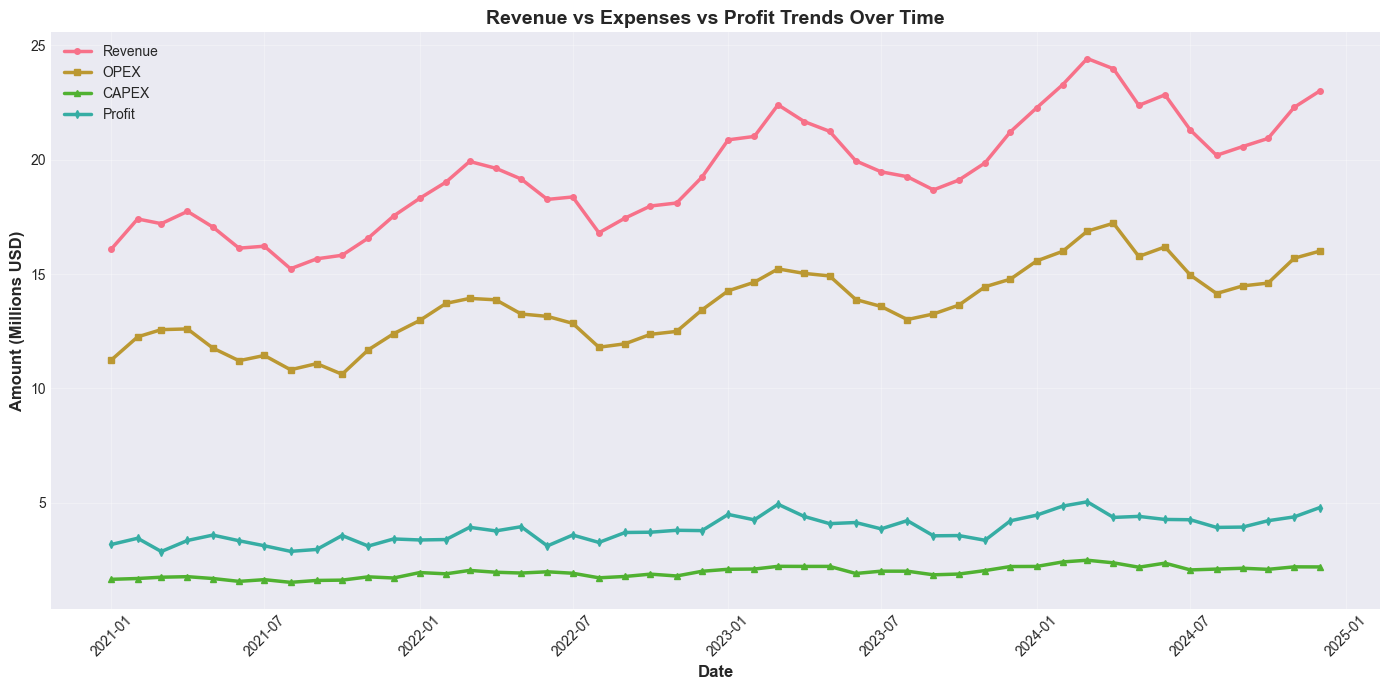

Chart saved: revenue_expense_profit_trends.png


<Figure size 640x480 with 0 Axes>

In [5]:
# Aggregate monthly totals
monthly_totals = financials.groupby('year_month').agg({
    'revenue': 'sum',
    'opex': 'sum',
    'capex': 'sum',
    'profit': 'sum'
}).reset_index()
monthly_totals['year_month'] = pd.to_datetime(monthly_totals['year_month'])

# Create trend chart
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(monthly_totals['year_month'], monthly_totals['revenue'] / 1e6, 
        label='Revenue', linewidth=2.5, marker='o', markersize=4)
ax.plot(monthly_totals['year_month'], monthly_totals['opex'] / 1e6, 
        label='OPEX', linewidth=2.5, marker='s', markersize=4)
ax.plot(monthly_totals['year_month'], monthly_totals['capex'] / 1e6, 
        label='CAPEX', linewidth=2.5, marker='^', markersize=4)
ax.plot(monthly_totals['year_month'], monthly_totals['profit'] / 1e6, 
        label='Profit', linewidth=2.5, marker='d', markersize=4)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Amount (Millions USD)', fontsize=12, fontweight='bold')
ax.set_title('Revenue vs Expenses vs Profit Trends Over Time', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('../images/revenue_expense_profit_trends.png', dpi=300, bbox_inches='tight')
print("Chart saved: revenue_expense_profit_trends.png")


## 3. Profit Margin by Department


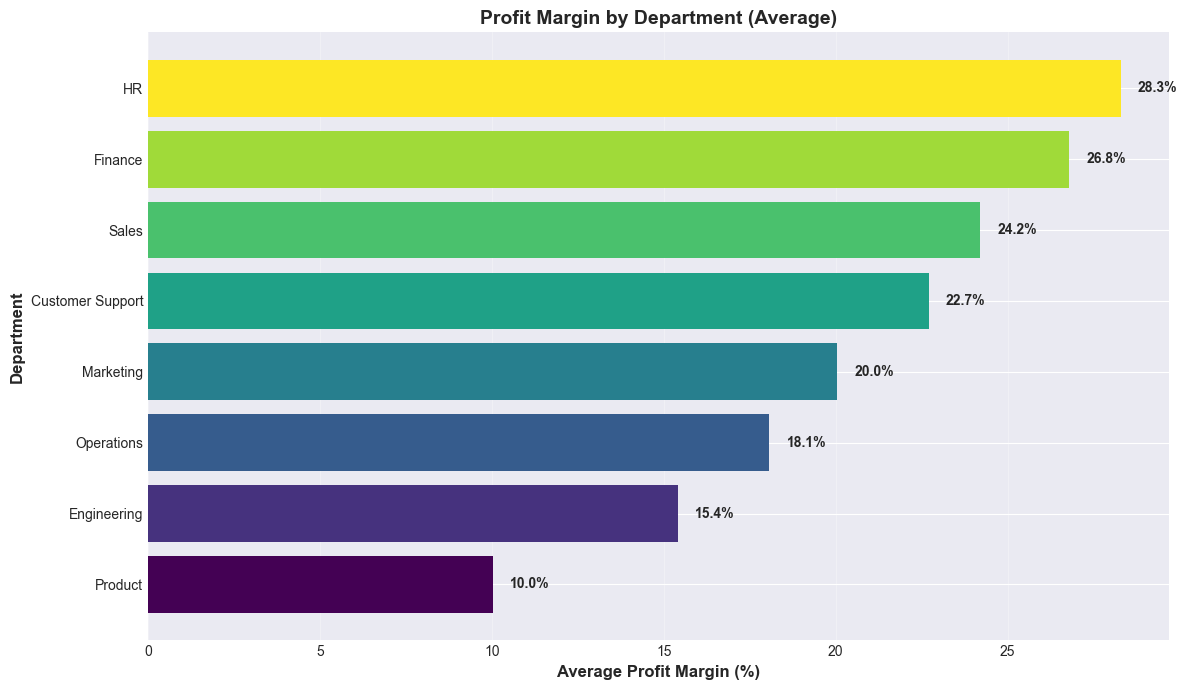

Chart saved: profit_margin_by_department.png


<Figure size 640x480 with 0 Axes>

In [6]:
# Calculate average profit margin by department
dept_profit_margin = financials.groupby('department_name')['profit_margin'].mean().sort_values(ascending=True)

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(dept_profit_margin)))
bars = ax.barh(dept_profit_margin.index, dept_profit_margin.values, color=colors)

# Add value labels
for i, (dept, value) in enumerate(dept_profit_margin.items()):
    ax.text(value + 0.5, i, f'{value:.1f}%', va='center', fontweight='bold')

ax.set_xlabel('Average Profit Margin (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Department', fontsize=12, fontweight='bold')
ax.set_title('Profit Margin by Department (Average)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()
plt.savefig('../images/profit_margin_by_department.png', dpi=300, bbox_inches='tight')
print("Chart saved: profit_margin_by_department.png")


## 4. Variance Analysis - Actual vs Budget vs Forecast


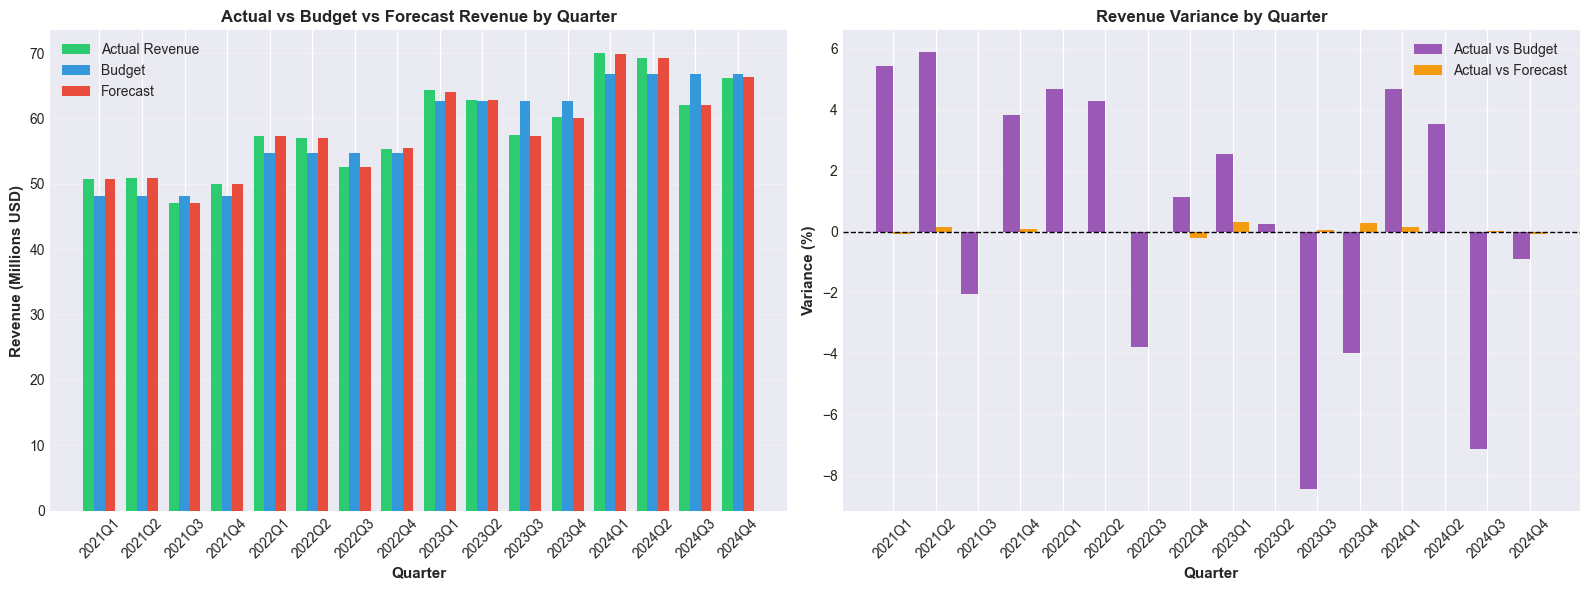

Chart saved: variance_analysis_quarterly.png


<Figure size 640x480 with 0 Axes>

In [7]:
# Aggregate by quarter
financials['quarter_date'] = pd.to_datetime(financials['date']).dt.to_period('Q').astype(str)
quarterly_variance = financials.groupby('quarter_date').agg({
    'revenue': 'sum',
    'budget': 'sum',
    'forecast': 'sum'
}).reset_index()

quarterly_variance['actual_vs_budget'] = ((quarterly_variance['revenue'] - quarterly_variance['budget']) / quarterly_variance['budget'] * 100).round(2)
quarterly_variance['actual_vs_forecast'] = ((quarterly_variance['revenue'] - quarterly_variance['forecast']) / quarterly_variance['forecast'] * 100).round(2)

# Create variance chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Revenue comparison
x = range(len(quarterly_variance))
width = 0.25
ax1.bar([i - width for i in x], quarterly_variance['revenue'] / 1e6, width, 
        label='Actual Revenue', color='#2ecc71')
ax1.bar(x, quarterly_variance['budget'] / 1e6, width, 
        label='Budget', color='#3498db')
ax1.bar([i + width for i in x], quarterly_variance['forecast'] / 1e6, width, 
        label='Forecast', color='#e74c3c')
ax1.set_xlabel('Quarter', fontsize=11, fontweight='bold')
ax1.set_ylabel('Revenue (Millions USD)', fontsize=11, fontweight='bold')
ax1.set_title('Actual vs Budget vs Forecast Revenue by Quarter', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(quarterly_variance['quarter_date'], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Chart 2: Variance percentages
ax2.bar([i - 0.2 for i in x], quarterly_variance['actual_vs_budget'], 0.4, 
        label='Actual vs Budget', color='#9b59b6')
ax2.bar([i + 0.2 for i in x], quarterly_variance['actual_vs_forecast'], 0.4, 
        label='Actual vs Forecast', color='#f39c12')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Quarter', fontsize=11, fontweight='bold')
ax2.set_ylabel('Variance (%)', fontsize=11, fontweight='bold')
ax2.set_title('Revenue Variance by Quarter', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(quarterly_variance['quarter_date'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
plt.savefig('../images/variance_analysis_quarterly.png', dpi=300, bbox_inches='tight')
print("Chart saved: variance_analysis_quarterly.png")


## 5. Department Performance Comparison


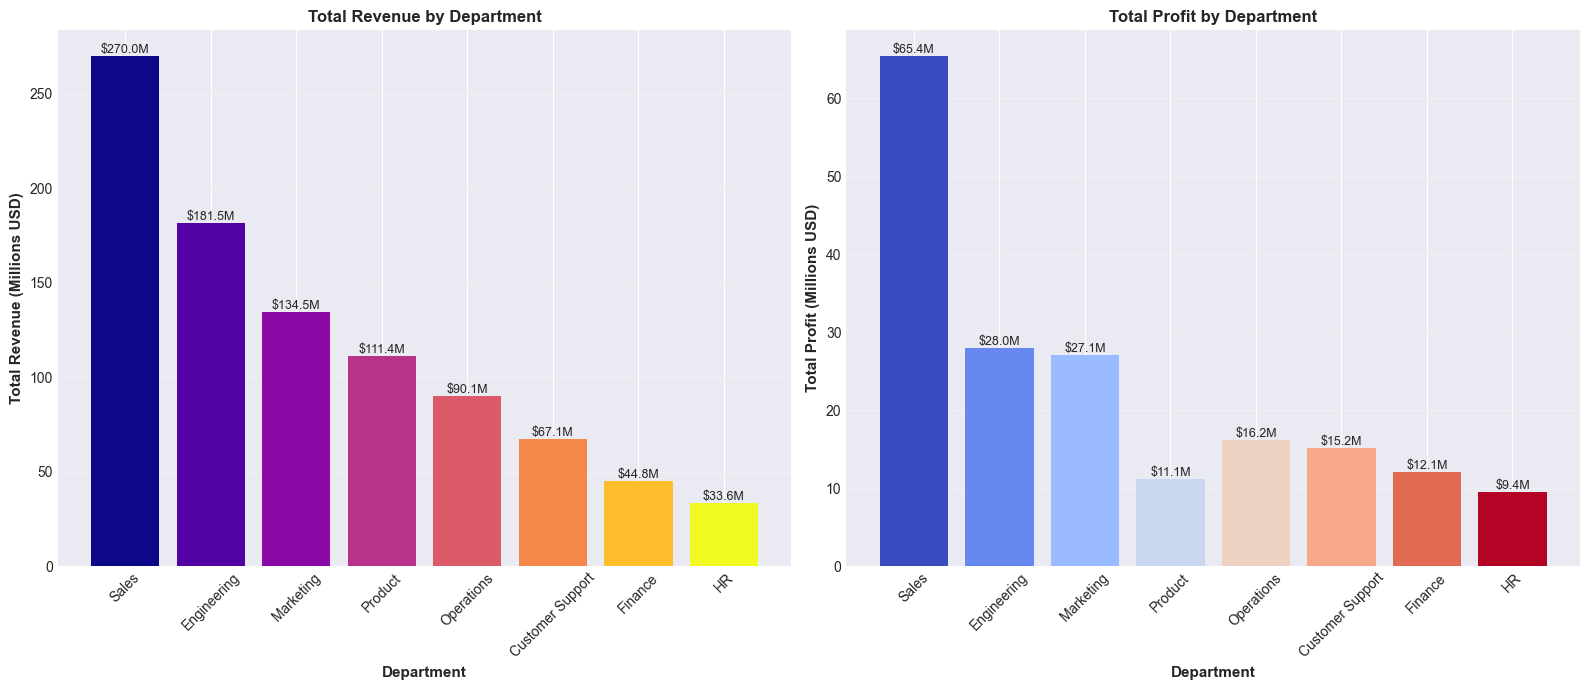

Chart saved: department_performance_comparison.png


<Figure size 640x480 with 0 Axes>

In [8]:
# Total revenue and profit by department
dept_performance = financials.groupby('department_name').agg({
    'revenue': 'sum',
    'profit': 'sum',
    'opex': 'sum'
}).reset_index()
dept_performance = dept_performance.sort_values('revenue', ascending=False)

# Create comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Revenue by department
colors1 = plt.cm.plasma(np.linspace(0, 1, len(dept_performance)))
bars1 = ax1.bar(dept_performance['department_name'], dept_performance['revenue'] / 1e6, color=colors1)
ax1.set_xlabel('Department', fontsize=11, fontweight='bold')
ax1.set_ylabel('Total Revenue (Millions USD)', fontsize=11, fontweight='bold')
ax1.set_title('Total Revenue by Department', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M', ha='center', va='bottom', fontsize=9)

# Profit by department
colors2 = plt.cm.coolwarm(np.linspace(0, 1, len(dept_performance)))
bars2 = ax2.bar(dept_performance['department_name'], dept_performance['profit'] / 1e6, color=colors2)
ax2.set_xlabel('Department', fontsize=11, fontweight='bold')
ax2.set_ylabel('Total Profit (Millions USD)', fontsize=11, fontweight='bold')
ax2.set_title('Total Profit by Department', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
plt.savefig('../images/department_performance_comparison.png', dpi=300, bbox_inches='tight')
print("Chart saved: department_performance_comparison.png")


## 6. Region Performance Comparison


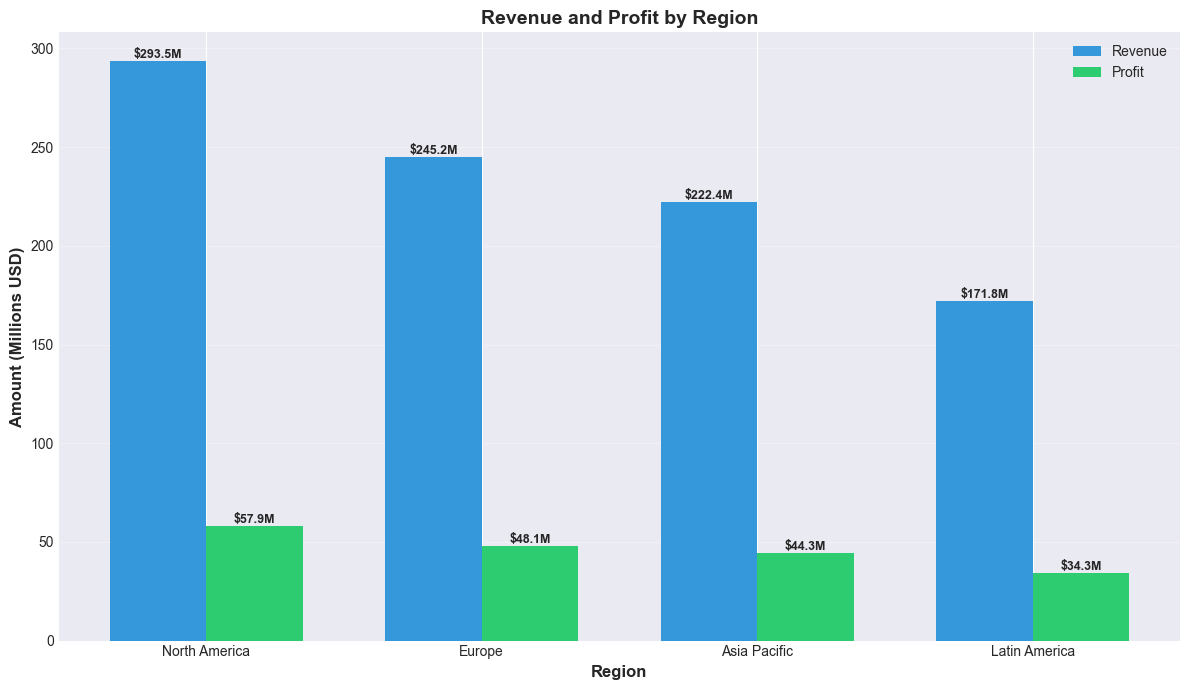

Chart saved: region_performance_comparison.png


<Figure size 640x480 with 0 Axes>

In [9]:
# Total revenue and profit by region
region_performance = financials.groupby('region_name').agg({
    'revenue': 'sum',
    'profit': 'sum',
    'profit_margin': 'mean'
}).reset_index()
region_performance = region_performance.sort_values('revenue', ascending=False)

# Create region comparison chart
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(region_performance))
width = 0.35

bars1 = ax.bar(x - width/2, region_performance['revenue'] / 1e6, width, 
               label='Revenue', color='#3498db')
bars2 = ax.bar(x + width/2, region_performance['profit'] / 1e6, width, 
               label='Profit', color='#2ecc71')

ax.set_xlabel('Region', fontsize=12, fontweight='bold')
ax.set_ylabel('Amount (Millions USD)', fontsize=12, fontweight='bold')
ax.set_title('Revenue and Profit by Region', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(region_performance['region_name'])
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.1f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
plt.savefig('../images/region_performance_comparison.png', dpi=300, bbox_inches='tight')
print("Chart saved: region_performance_comparison.png")


## 7. Operations KPIs Analysis


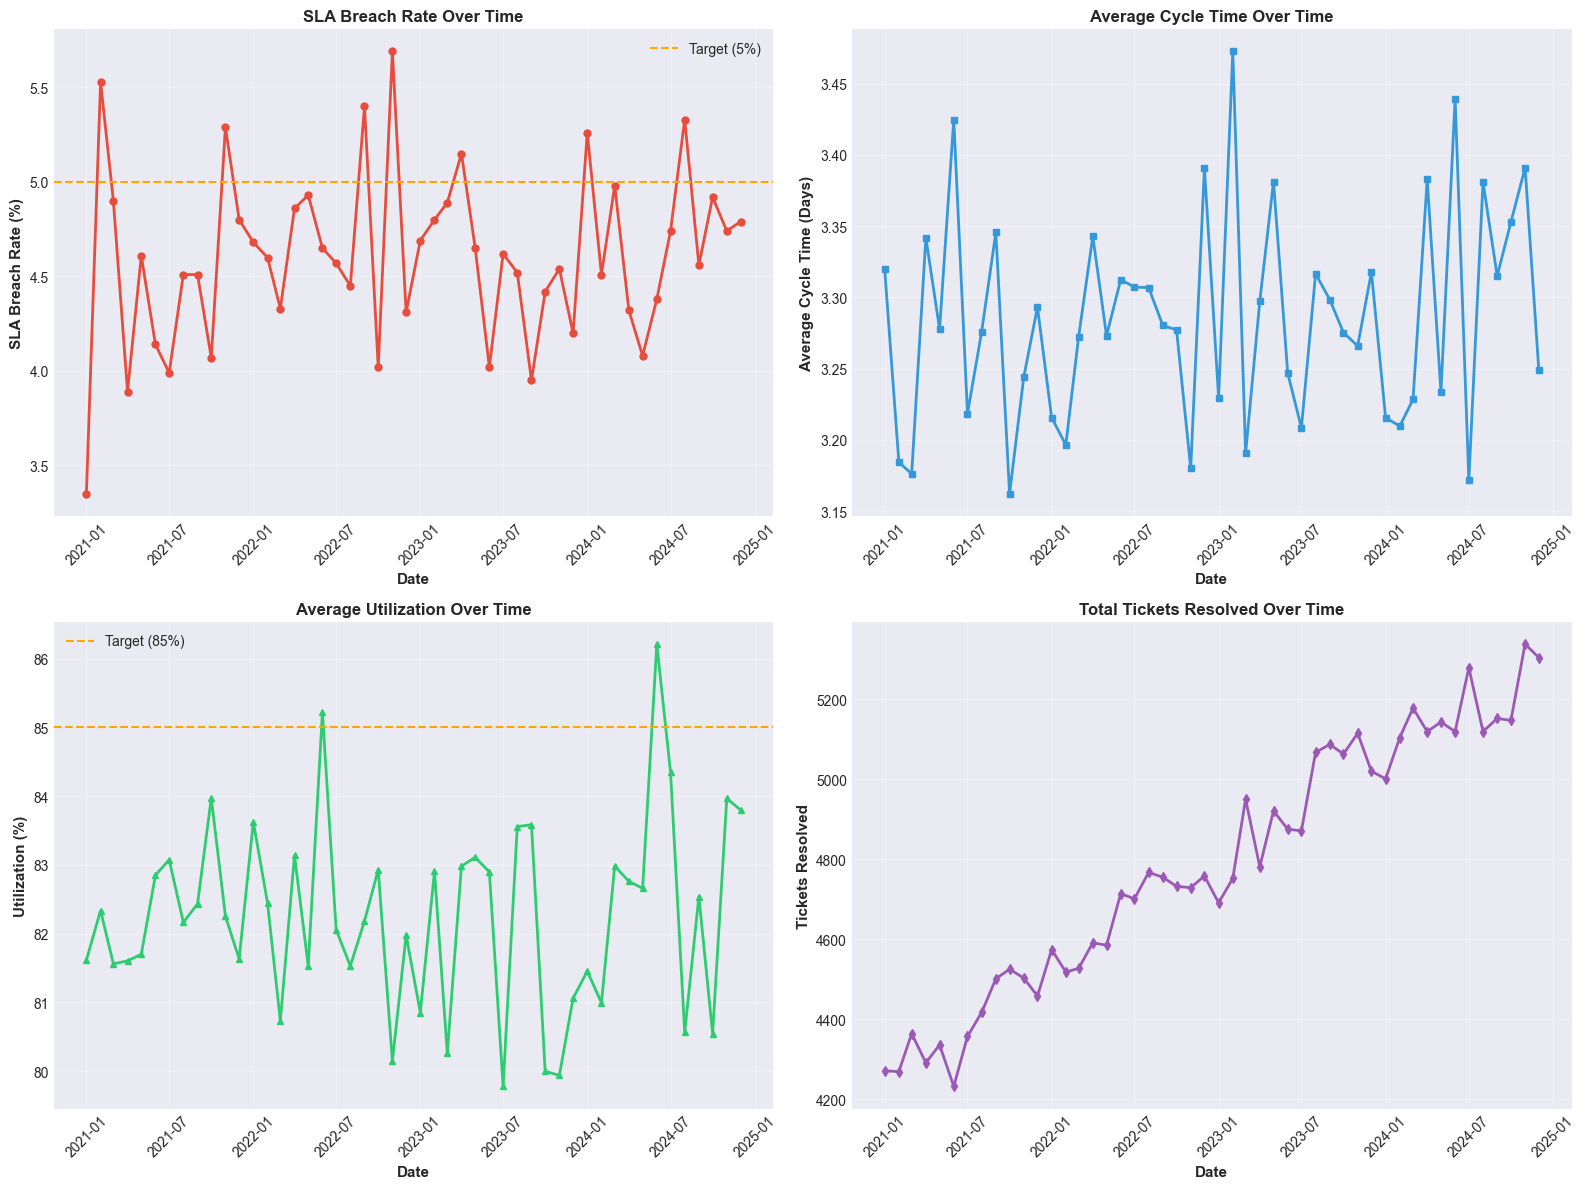

Chart saved: operations_kpis_analysis.png


<Figure size 640x480 with 0 Axes>

In [10]:
# Aggregate operations metrics by month
ops_monthly = operations.groupby('year_month').agg({
    'sla_breaches': 'sum',
    'tickets_resolved': 'sum',
    'cycle_time': 'mean',
    'utilization': 'mean'
}).reset_index()
ops_monthly['year_month'] = pd.to_datetime(ops_monthly['year_month'])
ops_monthly['sla_breach_rate'] = (ops_monthly['sla_breaches'] / ops_monthly['tickets_resolved'] * 100).round(2)

# Create operations KPIs chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# SLA Breach Rate
ax1.plot(ops_monthly['year_month'], ops_monthly['sla_breach_rate'], 
         marker='o', linewidth=2, color='#e74c3c', markersize=5)
ax1.set_xlabel('Date', fontsize=11, fontweight='bold')
ax1.set_ylabel('SLA Breach Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('SLA Breach Rate Over Time', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=5, color='orange', linestyle='--', label='Target (5%)')
ax1.legend()
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Cycle Time
ax2.plot(ops_monthly['year_month'], ops_monthly['cycle_time'], 
         marker='s', linewidth=2, color='#3498db', markersize=5)
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_ylabel('Average Cycle Time (Days)', fontsize=11, fontweight='bold')
ax2.set_title('Average Cycle Time Over Time', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Utilization
ax3.plot(ops_monthly['year_month'], ops_monthly['utilization'], 
         marker='^', linewidth=2, color='#2ecc71', markersize=5)
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_ylabel('Utilization (%)', fontsize=11, fontweight='bold')
ax3.set_title('Average Utilization Over Time', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=85, color='orange', linestyle='--', label='Target (85%)')
ax3.legend()
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# Tickets Resolved
ax4.plot(ops_monthly['year_month'], ops_monthly['tickets_resolved'], 
         marker='d', linewidth=2, color='#9b59b6', markersize=5)
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_ylabel('Tickets Resolved', fontsize=11, fontweight='bold')
ax4.set_title('Total Tickets Resolved Over Time', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.savefig('../images/operations_kpis_analysis.png', dpi=300, bbox_inches='tight')
print("Chart saved: operations_kpis_analysis.png")


## 8. Key Insights Summary


In [11]:
# Calculate key insights
total_revenue = financials['revenue'].sum() / 1e9  # Billions
total_profit = financials['profit'].sum() / 1e9
avg_profit_margin = financials['profit_margin'].mean()
avg_variance = financials['revenue_variance'].mean()
total_tickets = operations['tickets_resolved'].sum()
avg_sla_breach_rate = (operations['sla_breaches'].sum() / operations['tickets_resolved'].sum() * 100)
avg_utilization = operations['utilization'].mean()

print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)
print(f"\n📊 FINANCIAL METRICS:")
print(f"  • Total Revenue: ${total_revenue:.2f}B")
print(f"  • Total Profit: ${total_profit:.2f}B")
print(f"  • Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"  • Average Revenue Variance: {avg_variance:.2f}%")

print(f"\n⚙️ OPERATIONS METRICS:")
print(f"  • Total Tickets Resolved: {total_tickets:,}")
print(f"  • Average SLA Breach Rate: {avg_sla_breach_rate:.2f}%")
print(f"  • Average Utilization: {avg_utilization:.2f}%")

print(f"\n🏆 TOP PERFORMERS:")
top_dept_revenue = financials.groupby('department_name')['revenue'].sum().idxmax()
top_dept_margin = financials.groupby('department_name')['profit_margin'].mean().idxmax()
top_region = financials.groupby('region_name')['revenue'].sum().idxmax()
print(f"  • Highest Revenue Department: {top_dept_revenue}")
print(f"  • Best Profit Margin Department: {top_dept_margin}")
print(f"  • Top Revenue Region: {top_region}")

print("\n" + "=" * 60)


KEY INSIGHTS SUMMARY

📊 FINANCIAL METRICS:
  • Total Revenue: $0.93B
  • Total Profit: $0.18B
  • Average Profit Margin: 20.69%
  • Average Revenue Variance: 0.81%

⚙️ OPERATIONS METRICS:
  • Total Tickets Resolved: 229,671
  • Average SLA Breach Rate: 4.61%
  • Average Utilization: 82.26%

🏆 TOP PERFORMERS:
  • Highest Revenue Department: Sales
  • Best Profit Margin Department: HR
  • Top Revenue Region: North America

